In [1]:
# mounting notebook with my google drive environment 
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/NLP'

from functions import *
dataset_path = '/content/drive/My Drive/NLP/dataset/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/NLP


### Data

In [0]:
# loading data
X_full, X_train, X_test, y_train, y_test = load_data(dataset_path)

# vectorized training and testing examples
X_train_vec, X_test_vec = vectorizer(X_train, X_test)

# Naive Bayes

## With Sklearn

### Model

In [3]:
# creating and training a model
start_time = time.time()
model = nb_model(np.linspace(0.1,5, 10))
model.fit(X_train_vec, y_train)
pred_nb = model.predict(X_test_vec)
print('Execution time: {}'.format(time.time() - start_time))

Execution time: 0.2779834270477295


### Evaluation

In [0]:
# creating confusion matrix and classification report
cm_nb = confusion_matrix(y_test, pred_nb)
cr_nb = classification_report(y_test, pred_nb)

Best parameters are: {'alpha': 2.277777777777778}
Accuracy: 77.6058154531598 %

Confusion matrix: 
 [[843 253]
 [196 841]]

Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1096
           1       0.77      0.81      0.79      1037

    accuracy                           0.79      2133
   macro avg       0.79      0.79      0.79      2133
weighted avg       0.79      0.79      0.79      2133




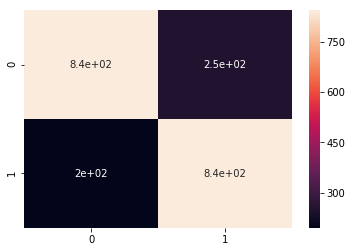

In [5]:
# best parameters
print('Best parameters are: {}'.format(model.best_params_))
# accuracy
print('Accuracy: {} %'.format(model.best_score_*100))
# confusion matrix, classification report
evaluate_model(y_test, pred_nb)

### Execution time for models comparison

In [6]:
start_log = time.time()
model = MultinomialNB(alpha=1.2)
model.fit(X_train_vec, y_train)
acc = model.score(X_test_vec, y_test)
print('Execution time: {}s'.format(time.time() - start_log))

Execution time: 0.01362156867980957s


## From scratch

In [7]:
start_time = time.time()
# calculating Naive Bayes model parameters
r, b = calculations(X_train_vec, y_train)

# predicting test data targets
pred_nb_sc = predict_Bayes(X_test_vec, r, b)

# calculating our model accuracy
accuracy = accuracy(pred_nb_sc, y_test)
print('Execution time: {}s'.format(time.time() - start_time))

Execution time: 0.008077621459960938s


Test accuracy: 78.4341303328645

Confusion matrix: 
 [[848 248]
 [212 825]]

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      1096
           1       0.77      0.80      0.78      1037

    accuracy                           0.78      2133
   macro avg       0.78      0.78      0.78      2133
weighted avg       0.78      0.78      0.78      2133




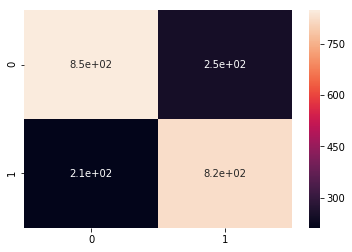

In [8]:
# printing accuracy
print('Test accuracy: {}'.format(accuracy))

# model evaluation (confusion matrix, heatmap)
evaluate_model(y_test, pred_nb_sc.T)

# Logistic regression

### Model

In [9]:
# creating and training a model
start_time = time.time()
model = loregr_model(np.linspace(1,10,10), ["l1","l2"])
model.fit(X_train_vec, y_train)
pred_lg = model.predict(X_test_vec)
print('Execution time: {}'.format(time.time() - start_time))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Execution time: 2.514981508255005


### Evaluation

In [0]:
# creating confusion matrix and classification report
cm_lg = confusion_matrix(y_test, pred_lg)
cr_lg = classification_report(y_test, pred_lg)

Best parameters are: {'C': 6.0, 'penalty': 'l2'}
Accuracy: 74.5339430179388 %

Confusion matrix: 
 [[827 269]
 [208 829]]

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78      1096
           1       0.76      0.80      0.78      1037

    accuracy                           0.78      2133
   macro avg       0.78      0.78      0.78      2133
weighted avg       0.78      0.78      0.78      2133




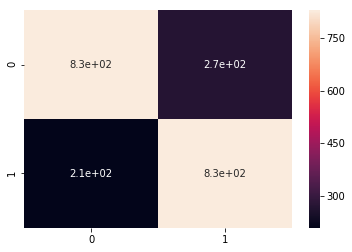

In [11]:
# best parameters
print('Best parameters are: {}'.format(model.best_params_))
# accuracy
print('Accuracy: {} %'.format(model.best_score_*100))
# confusion matrix, classification report
evaluate_model(y_test, pred_lg)

### Execution time for models comparison

In [12]:
start_log = time.time()
model = LogisticRegression(C=4, penalty='l2')
model.fit(X_train_vec, y_train)
acc = model.score(X_test_vec, y_test)
print('Execution time: {}s'.format(time.time() - start_log))

Execution time: 0.07344603538513184s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
